- *Separate by :06 v. :15 v. :30*
- *countplots (percentages preferred)*
- *% of aware, consider, purchase per question response*
- *Cramer's V*
- Possibly use mean differences (set as placedholder below)
- Decision Trees

In [13]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, pydotplus
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [14]:
df = pd.read_csv(r'G:\My Drive\Creative_Meta_Analysis\Data\Clean_Data.csv',
                 encoding='latin1', 
                 na_values='', 
                 keep_default_na=False)

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df = df[
    (df['Platform'] == 'Desktop') & 
    (df['Region'] == 'NA') & 
    (df['Format'] == 'Video') & 
    (df['Set_Cell'] != 0) & 
    ((df['Video_Length'] == ':06') | (df['Video_Length'] == ':15') | (df['Video_Length'] == ':30'))
]

df = df.replace(
    {
        'Gender': {'Male': 0, 'Female': 1},
        'Operating System': {'Android': 0, 'iOS': 1},
        'Age_Recode': {'18-29': 0, '30-44': 1, '45+':2}
    }
)

In [12]:
df[df.Video_Length == ':06'].shape

(6600, 36)

#### "Measurement error" within the funnel.

In [116]:
pd.crosstab(df['Consideration_Intent'], df['Aided_Awareness'])

Aided_Awareness,0.0,1.0
Consideration_Intent,,
0.0,7383,11188
1.0,1479,11899


In [117]:
pd.crosstab( df['Purchase_Intent'], df['Aided_Awareness'])

Aided_Awareness,0.0,1.0
Purchase_Intent,,
0.0,601,1796
1.0,1716,1957
2.0,1462,2918
3.0,3225,6800
4.0,1876,6910
5.0,1080,5793


In [118]:
pd.crosstab( df['Purchase_Intent'], df['Consideration_Intent'])

Consideration_Intent,0.0,1.0
Purchase_Intent,,
0.0,1982,394
1.0,2646,217
2.0,2701,634
3.0,4401,3070
4.0,2409,3760
5.0,1878,2982


In [63]:
# Create new dataframes based on if user is "Aware" and/or "Considering".

# df_cons = df[(df['Aided_Awareness'] == 1)]
# df_purch = df[(df['Aided_Awareness'] == 1) & (df['Consideration_Intent'] == 1)]

## Standard Plots

In [105]:
labels = [
    'Gender', 
    'Age_Recode',
    'Enjoyment',
    'Interesting',
    'Unique',
    'Involving',
    'Understanding',
    'Relevance',
    'Branding',
    'Brand_Appeal',
    'Distinctiveness',
    'Aided_Awareness',
    'Consideration_Intent',
    'Purchase_Intent'
]

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


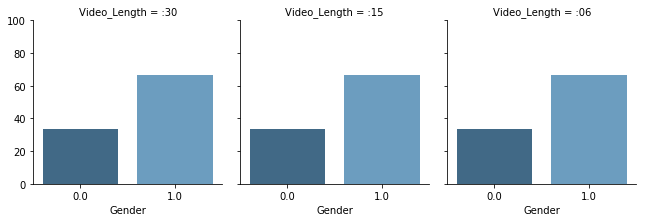

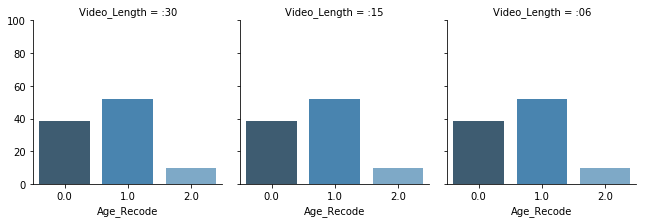

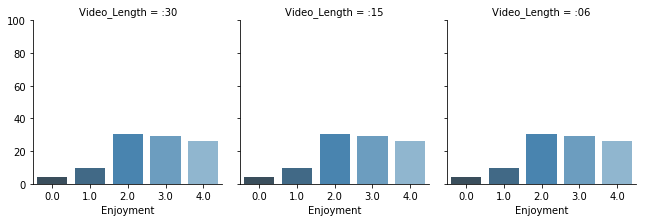

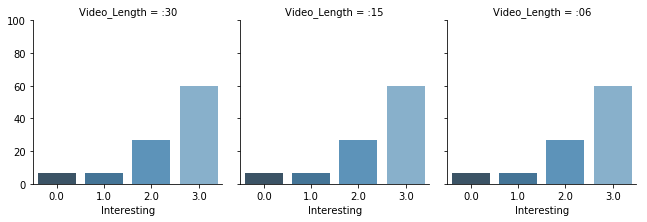

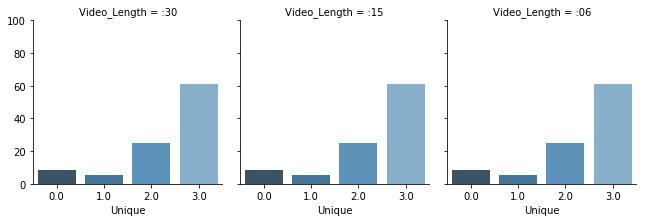

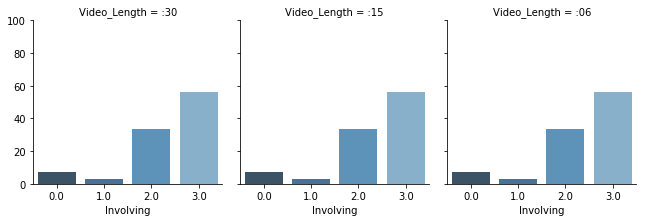

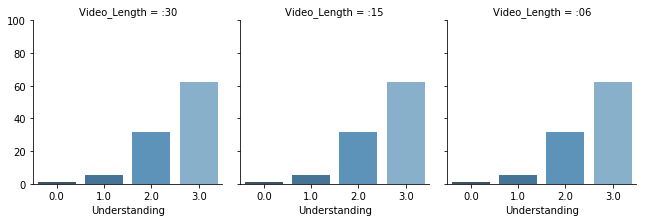

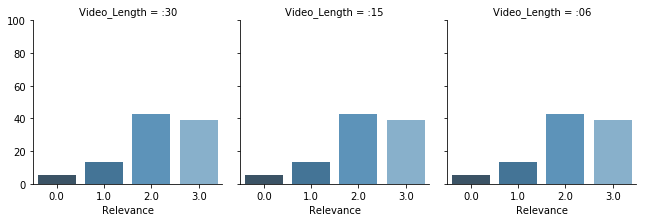

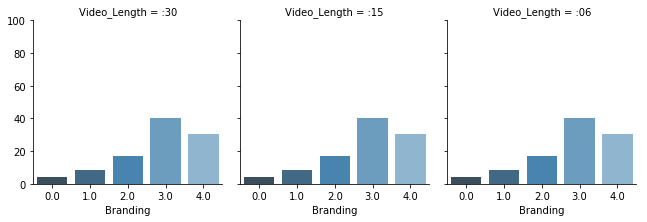

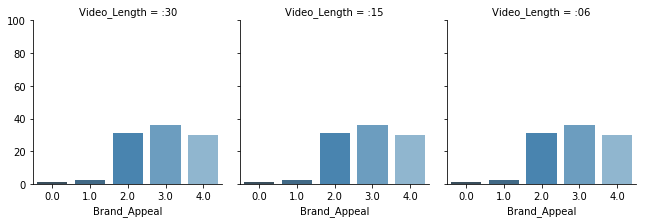

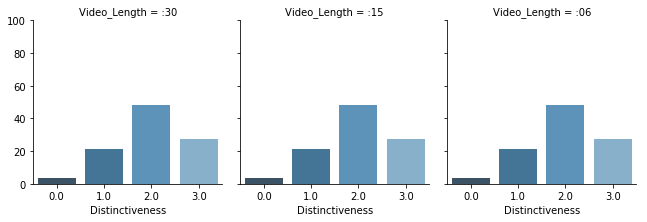

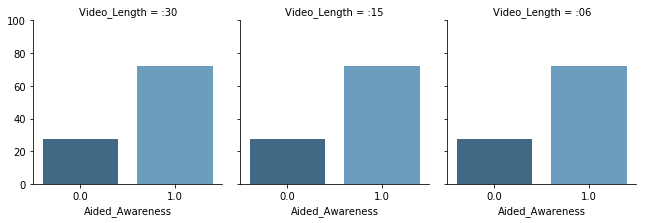

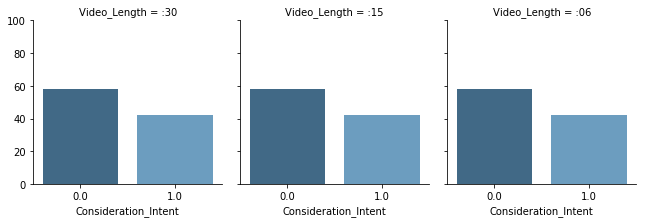

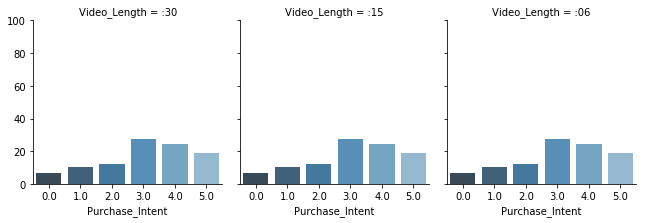

In [121]:
for label in labels:
    g = sns.FacetGrid(data=df, col='Video_Length')
    g.map(sns.barplot, x=df[label].dropna(), y=df[label].dropna(), estimator=lambda x: len(x) / len(df[label].dropna()) * 100, 
          palette='Blues_d')
    g.set_xlabels(label)
    plt.ylim(0, 100)

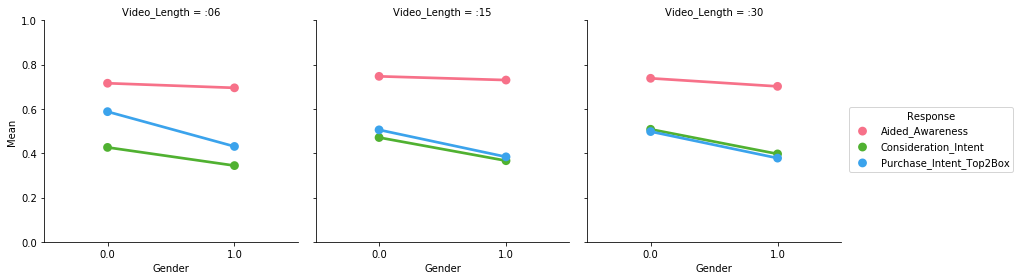

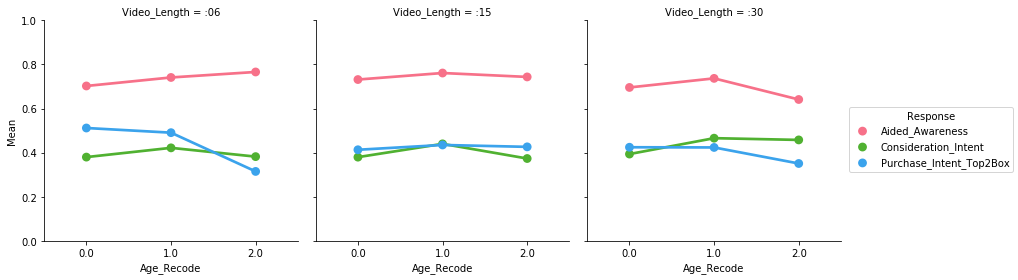

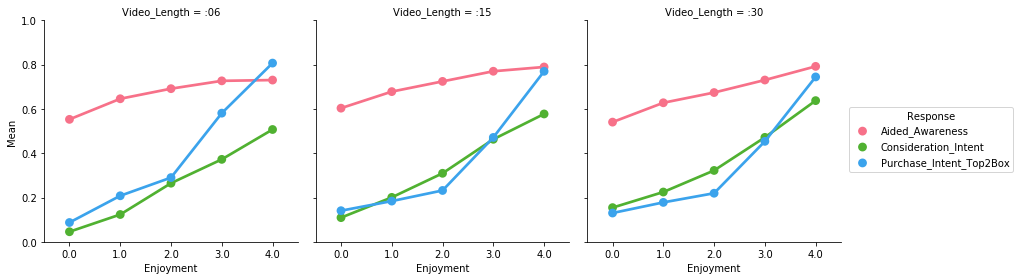

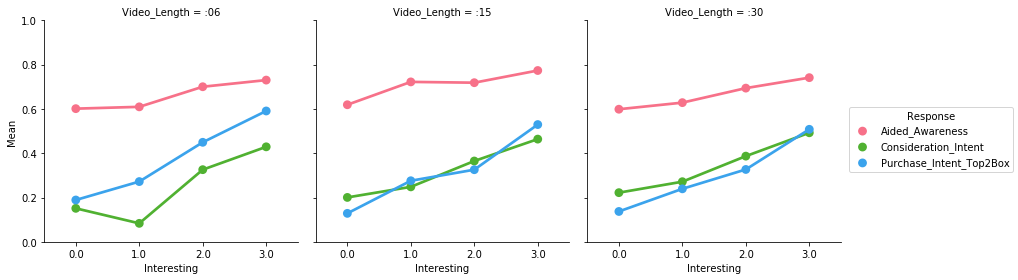

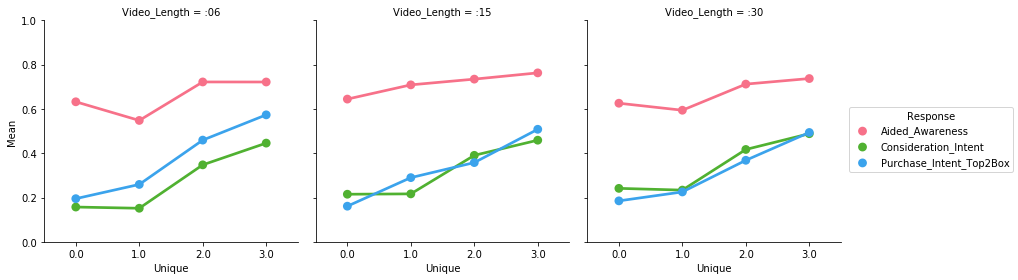

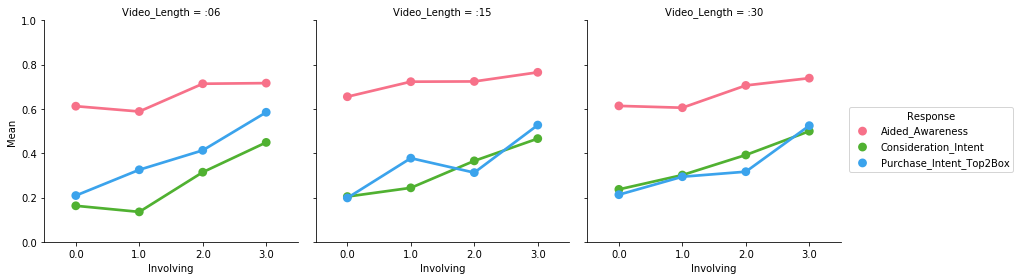

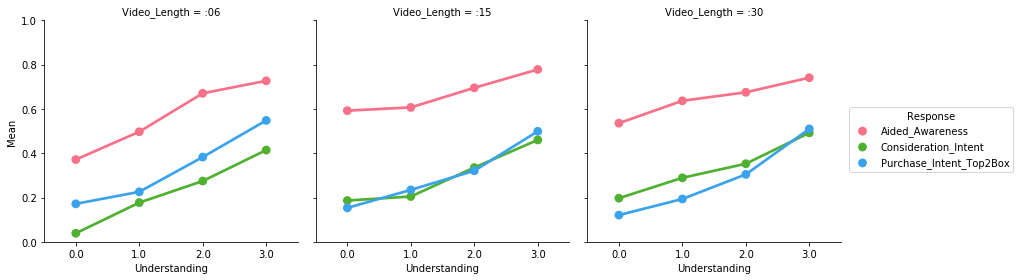

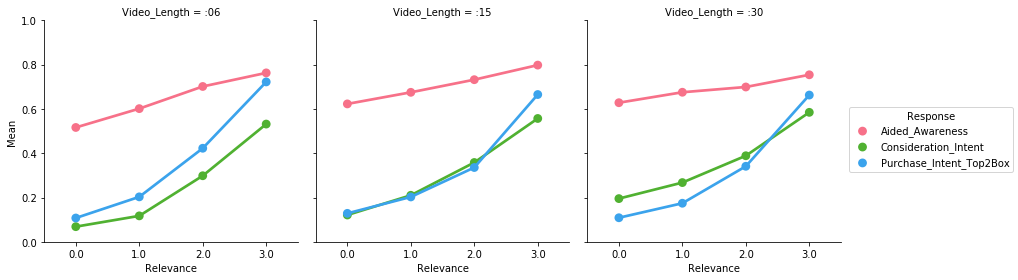

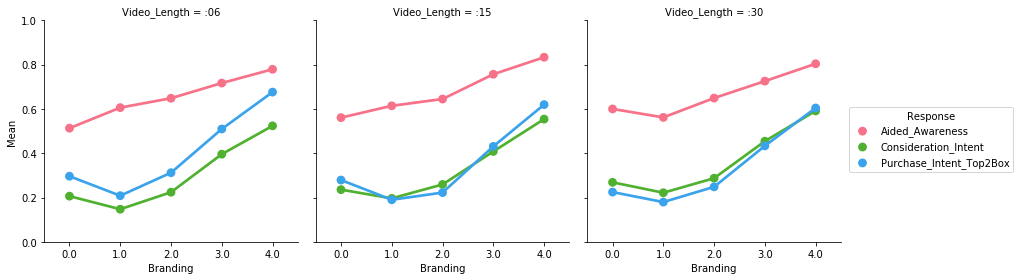

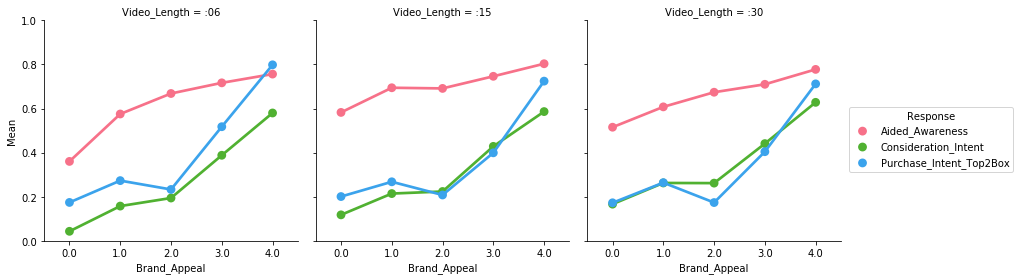

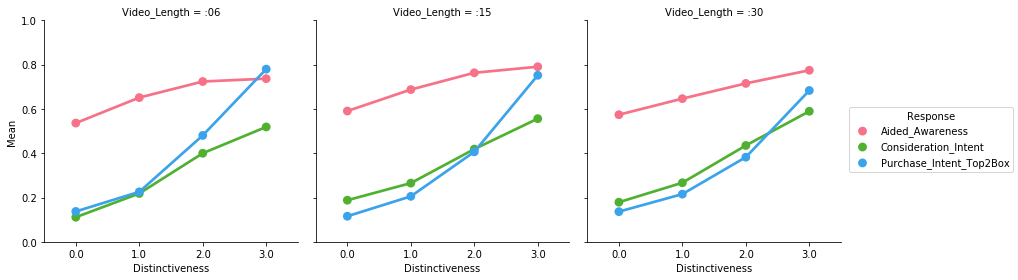

In [130]:
for label in labels[:-3]:
    
    data = df.groupby([label, 'Video_Length'])[['Aided_Awareness', 
                                                'Consideration_Intent', 
                                                'Purchase_Intent_Top2Box']].mean().reset_index()
    
    data = data.melt(id_vars=[label, 'Video_Length'], 
                     value_vars=['Aided_Awareness', 'Consideration_Intent', 'Purchase_Intent_Top2Box'],
                     value_name='Mean',
                     var_name='Response')

    sns.factorplot(x=label, y='Mean', col='Video_Length', hue='Response', data=data, ci=95, join=True, palette='husl')
    
    plt.ylim(0, 1)

### Correlation Matrix (Spearman)

#### Video Length: :06

In [108]:
corr = df[df['Video_Length'] == ':06'][labels[2:-3] + ['Purchase_Intent']].corr(method='spearman')
corr

,Enjoyment,Interesting,Unique,Involving,Understanding,Relevance,Branding,Brand_Appeal,Distinctiveness,Purchase_Intent
Enjoyment,1.000000,0.480449,0.427141,0.483769,0.323491,0.584261,0.447067,0.661964,0.569450,0.538488
Interesting,0.480449,1.000000,0.520258,0.485872,0.257041,0.437216,0.369406,0.475241,0.403295,0.301467
Unique,0.427141,0.520258,1.000000,0.497384,0.180354,0.353021,0.290462,0.394962,0.389432,0.288417
Involving,0.483769,0.485872,0.497384,1.000000,0.232389,0.424418,0.356351,0.457312,0.389059,0.282380
Understanding,0.323491,0.257041,0.180354,0.232389,1.000000,0.445708,0.424660,0.419933,0.287664,0.233373
Relevance,0.584261,0.437216,0.353021,0.424418,0.445708,1.000000,0.490729,0.655565,0.524641,0.470096
Branding,0.447067,0.369406,0.290462,0.356351,0.424660,0.490729,1.000000,0.553320,0.454586,0.358241
Brand_Appeal,0.661964,0.475241,0.394962,0.457312,0.419933,0.655565,0.553320,1.000000,0.601879,0.503138
Distinctiveness,0.569450,0.403295,0.389432,0.389059,0.287664,0.524641,0.454586,0.601879,1.000000,0.477441
Purchase_Intent,0.538488,0.301467,0.288417,0.282380,0.233373,0.470096,0.358241,0.503138,0.477441,1.000000


Text(0.5,1,'Video_Length: 06s')

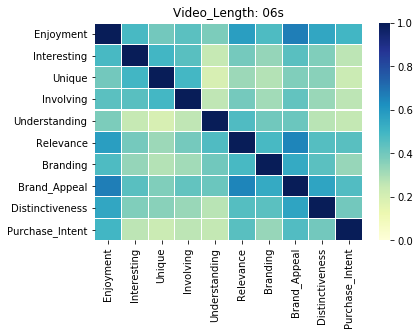

In [126]:
sns.heatmap(corr, linewidths=0.1, cmap="YlGnBu", vmin=0, vmax=1).set_title('Video_Length: 06s')

#### Video Length: :15

In [110]:
corr = df[df['Video_Length'] == ':15'][labels[2:-3] + ['Purchase_Intent']].corr(method='spearman')
corr

,Enjoyment,Interesting,Unique,Involving,Understanding,Relevance,Branding,Brand_Appeal,Distinctiveness,Purchase_Intent
Enjoyment,1.000000,0.492846,0.416818,0.462229,0.375619,0.600272,0.466094,0.665703,0.574831,0.499250
Interesting,0.492846,1.000000,0.505202,0.479319,0.257446,0.425068,0.354162,0.457062,0.390627,0.288278
Unique,0.416818,0.505202,1.000000,0.506691,0.212696,0.375656,0.304124,0.391846,0.390391,0.243538
Involving,0.462229,0.479319,0.506691,1.000000,0.236196,0.407659,0.325377,0.423941,0.363457,0.258051
Understanding,0.375619,0.257446,0.212696,0.236196,1.000000,0.455347,0.394472,0.403024,0.290054,0.208708
Relevance,0.600272,0.425068,0.375656,0.407659,0.455347,1.000000,0.490386,0.645443,0.502451,0.427896
Branding,0.466094,0.354162,0.304124,0.325377,0.394472,0.490386,1.000000,0.523032,0.472865,0.332576
Brand_Appeal,0.665703,0.457062,0.391846,0.423941,0.403024,0.645443,0.523032,1.000000,0.586112,0.439264
Distinctiveness,0.574831,0.390627,0.390391,0.363457,0.290054,0.502451,0.472865,0.586112,1.000000,0.457312
Purchase_Intent,0.499250,0.288278,0.243538,0.258051,0.208708,0.427896,0.332576,0.439264,0.457312,1.000000


Text(0.5,1,'Video_Length: 15s')

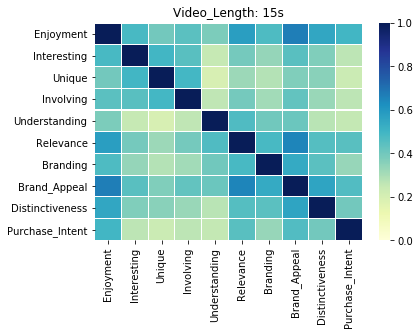

In [127]:
sns.heatmap(corr, linewidths=0.1, cmap="YlGnBu", vmin=0, vmax=1).set_title('Video_Length: 15s')

#### Video Length: :30

In [112]:
corr = df[df['Video_Length'] == ':30'][labels[2:-3] + ['Purchase_Intent']].corr(method='spearman')
corr

,Enjoyment,Interesting,Unique,Involving,Understanding,Relevance,Branding,Brand_Appeal,Distinctiveness,Purchase_Intent
Enjoyment,1.000000,0.486602,0.399439,0.448855,0.380804,0.581830,0.473515,0.671831,0.554114,0.496196
Interesting,0.486602,1.000000,0.496689,0.452888,0.250283,0.396378,0.338342,0.452151,0.372087,0.269469
Unique,0.399439,0.496689,1.000000,0.493691,0.198987,0.327523,0.281738,0.374796,0.356889,0.235473
Involving,0.448855,0.452888,0.493691,1.000000,0.261890,0.394897,0.313209,0.431754,0.330453,0.267691
Understanding,0.380804,0.250283,0.198987,0.261890,1.000000,0.468876,0.403148,0.416311,0.274495,0.254271
Relevance,0.581830,0.396378,0.327523,0.394897,0.468876,1.000000,0.485196,0.652919,0.458579,0.450544
Branding,0.473515,0.338342,0.281738,0.313209,0.403148,0.485196,1.000000,0.542245,0.448582,0.333195
Brand_Appeal,0.671831,0.452151,0.374796,0.431754,0.416311,0.652919,0.542245,1.000000,0.559358,0.468167
Distinctiveness,0.554114,0.372087,0.356889,0.330453,0.274495,0.458579,0.448582,0.559358,1.000000,0.401048
Purchase_Intent,0.496196,0.269469,0.235473,0.267691,0.254271,0.450544,0.333195,0.468167,0.401048,1.000000


Text(0.5,1,'Video_Length: 30s')

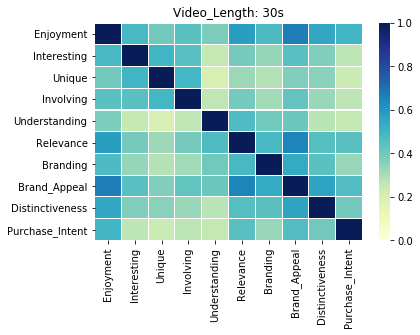

In [128]:
sns.heatmap(corr, linewidths=0.1, cmap="YlGnBu", vmin=0, vmax=1).set_title('Video_Length: 30s')

### Decision Trees

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def fit_and_print_dt(data, response_var, labels, vid_len, doc_name):
    '''
    A function to prep data, train, fit, score and graph a decision tree.
    
    Input:
        data: Input dataframe to analyze.
        response_var: Include the response variable to analyze (awareness, consideration & purchase)
        labels: Include the labels, in numeric order, of the response variable.
        vid_len: The dataframe filtered by video length (:06, :15, or :30)
        doc_name: Name the document to save the tree graph to (will include as a .dot file)
    
    Output:
        None
    '''
    dt_df = df[[
        response_var,
        'Enjoyment',
        'Involving',
        'Interesting',
        'Unique',
        'Understanding',
        'Relevance',
        'Branding',
        'Brand_Appeal',
        'Distinctiveness',
        'Age_Recode',
        'Video_Length'
    ]].dropna()

    dt_df = pd.get_dummies(dt_df, columns=['Involving', 'Interesting', 'Unique'])
    dt_df = dt_df[dt_df['Video_Length'] == vid_len]
    
    X = dt_df.drop([response_var, 'Video_Length'], axis=1)
    y = dt_df[response_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    dt = DecisionTreeClassifier(min_samples_leaf=10)
    dt_parameters = [{
            'max_depth': [x for x in range(1, 4)]
    }]

    dt_grid = GridSearchCV(dt, dt_parameters)
    dt_grid_fit = dt_grid.fit(X_train, y_train)
    
    print("Accuracy:", accuracy_score(y_test, dt_grid_fit.best_estimator_.predict(X_test)))
    
    export_graphviz(dt_grid_fit.best_estimator_,
                out_file=doc_name + '.dot',
                rounded=True,
                feature_names=X_train.columns,
                filled=True,
                class_names=labels)

In [76]:
fit_and_print_dt(df, 'Aided_Awareness', ['Unaware', 'Aware'], ':06', "tree_6_aided")
fit_and_print_dt(df, 'Aided_Awareness', ['Unaware', 'Aware'], ':15', "tree_15_aided")
fit_and_print_dt(df, 'Aided_Awareness', ['Unaware', 'Aware'], ':30', "tree_30_aided")

Accuracy: 0.71972049689441
Accuracy: 0.7578577336641853
Accuracy: 0.7146346427844494


In [77]:
fit_and_print_dt(df, 'Consideration_Intent', ['Not_Consider', 'Consider'], ':06', "tree_6_cons")
fit_and_print_dt(df, 'Consideration_Intent', ['Not_Consider', 'Consider'], ':15', "tree_15_cons")
fit_and_print_dt(df, 'Consideration_Intent', ['Not_Consider', 'Consider'], ':30', "tree_30_cons")

Accuracy: 0.6451612903225806
Accuracy: 0.6513020053876085
Accuracy: 0.6508810572687225


In [78]:
fit_and_print_dt(df, 'Purchase_Intent_Top2Box', ['Not_Purchase', 'Purchase'], ':06', "tree_6_purch")
fit_and_print_dt(df, 'Purchase_Intent_Top2Box', ['Not_Purchase', 'Purchase'], ':15', "tree_15_purch")
fit_and_print_dt(df, 'Purchase_Intent_Top2Box', ['Not_Purchase', 'Purchase'], ':30', "tree_30_purch")

Accuracy: 0.7220496894409938
Accuracy: 0.7104609439690864
Accuracy: 0.717833632555356


## Top2 Box Plots

In [41]:
top2_labels = [
    'Enjoyment_Top2Box',
    'Interesting_Top2Box',
    'Unique_Top2Box',
    'Involving_Top2Box',
    'Understanding_Top2Box',
    'Relevance_Top2Box',
    'Branding_Top2Box',
    'Brand_Appeal_Top2Box',
    'Distinctiveness_Top2Box',
    'Purchase_Intent_Top2Box'
]

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


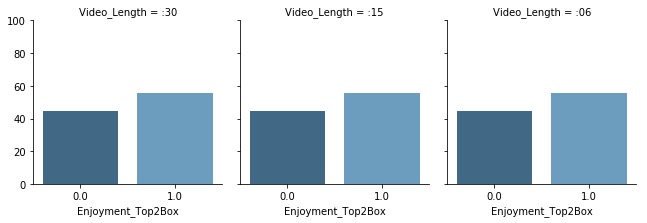

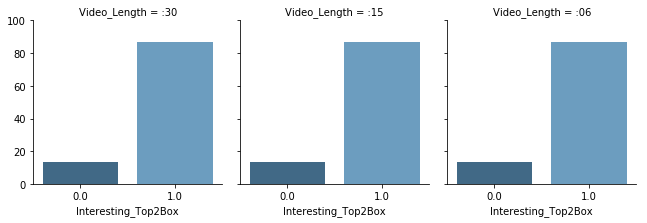

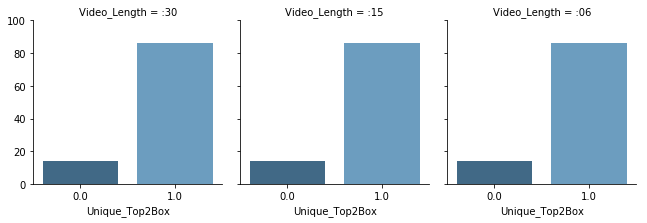

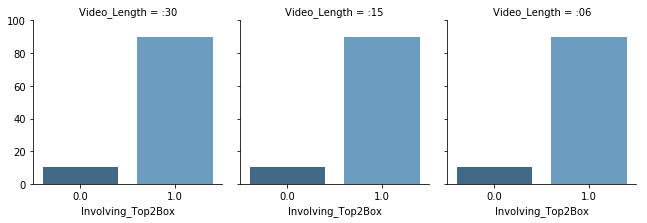

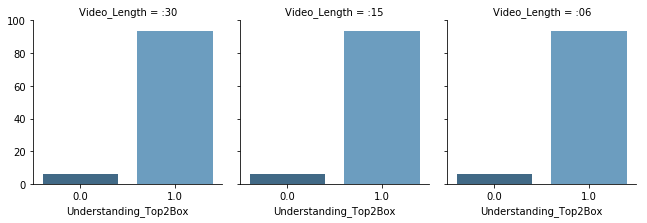

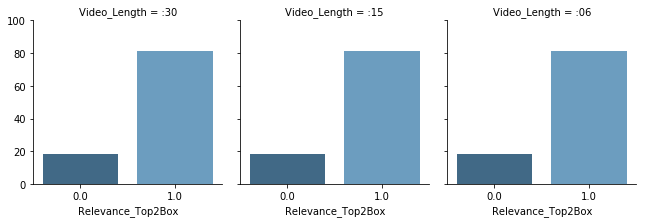

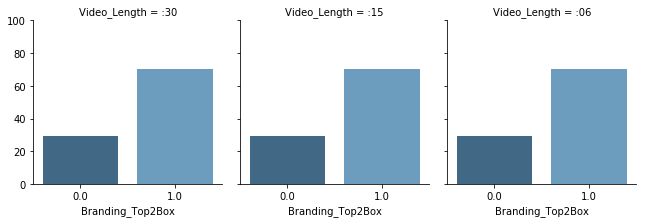

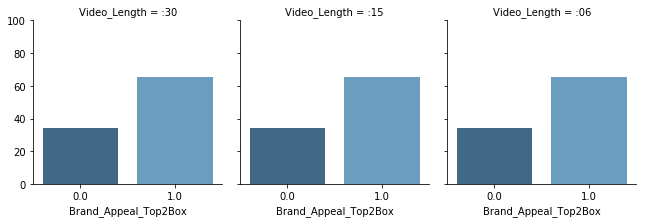

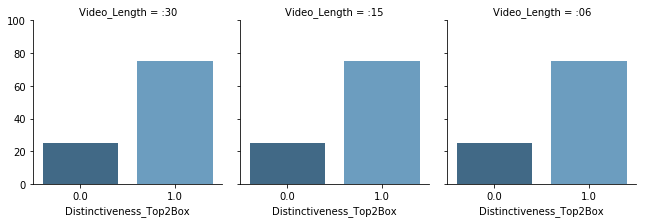

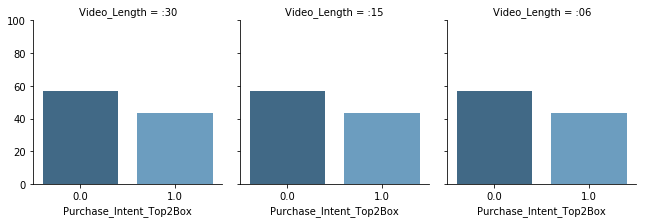

In [122]:
for label in top2_labels:
    g = sns.FacetGrid(data=df, col='Video_Length')
    g.map(sns.barplot, x=df[label].dropna(), y=df[label].dropna(), estimator=lambda x: len(x) / len(df[label].dropna()) * 100, 
          palette='Blues_d')
    g.set_xlabels(label)
    plt.ylim(0, 100)

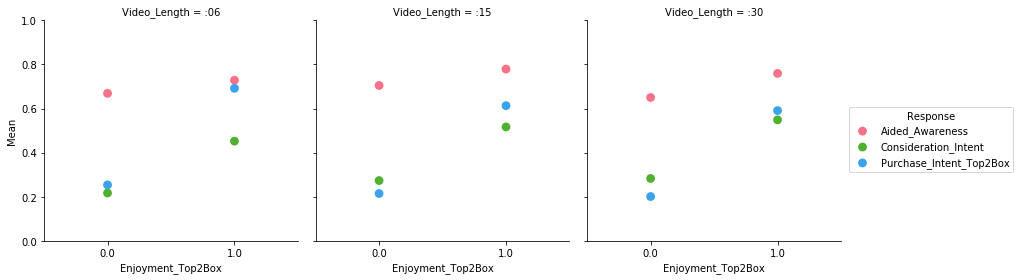

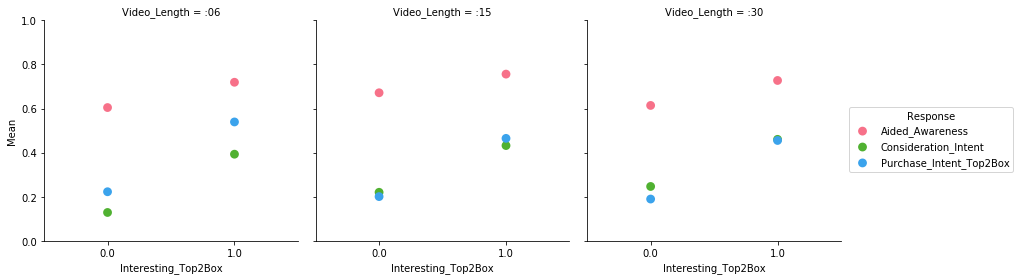

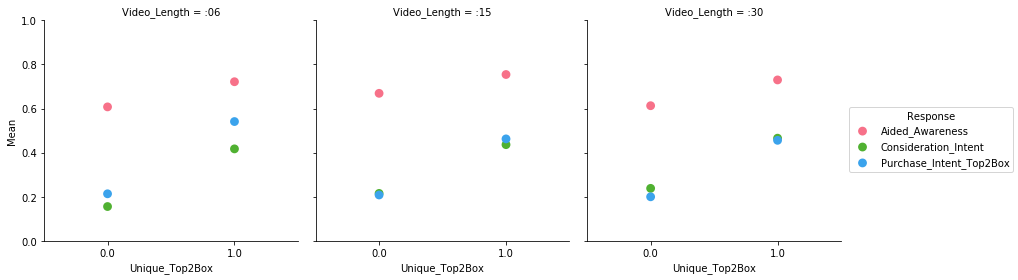

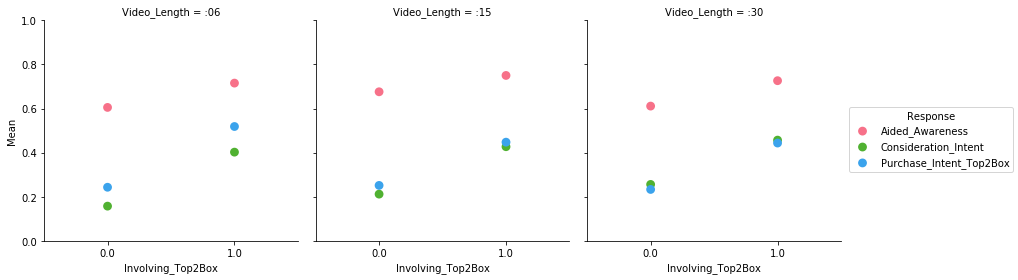

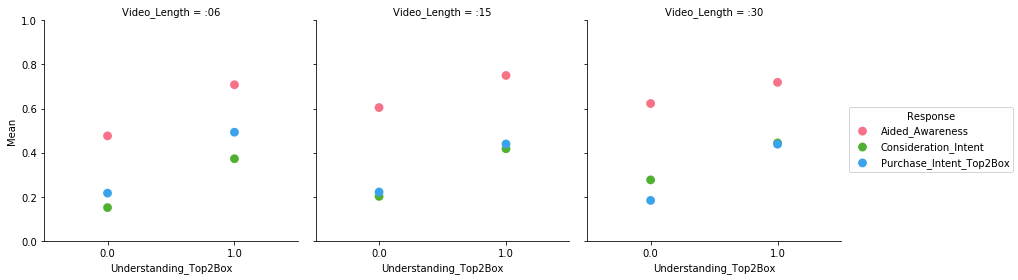

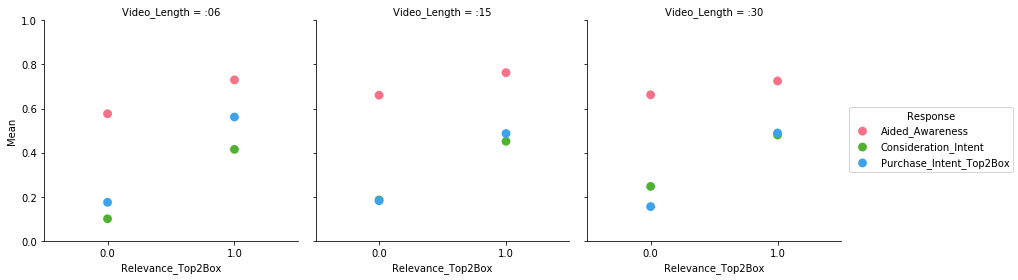

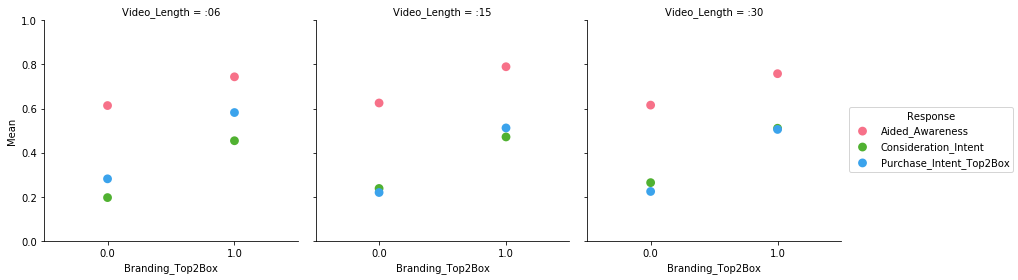

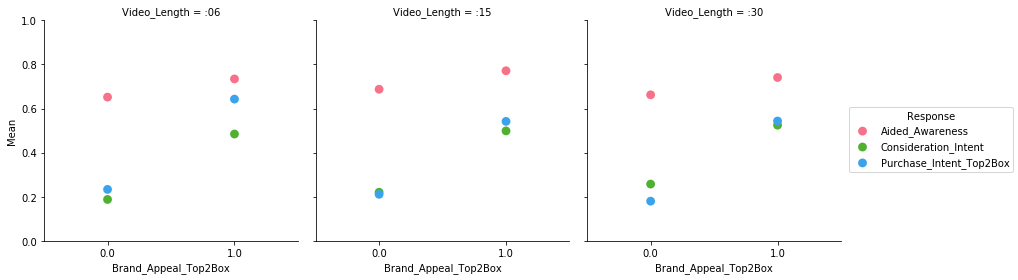

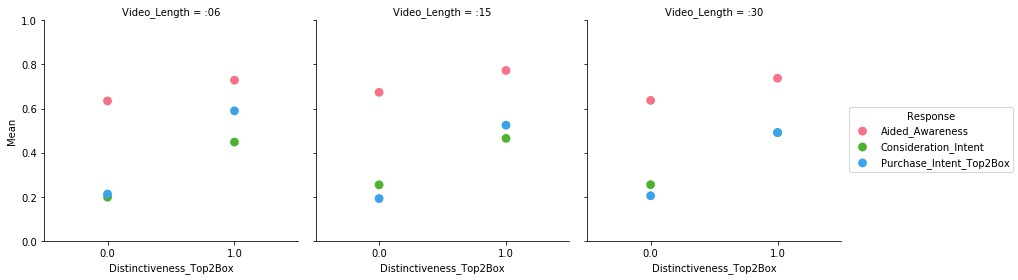

In [40]:
for label in top2_labels[:-1]:
    
    data = df.groupby([label, 'Video_Length'])[['Aided_Awareness', 
                                                'Consideration_Intent', 
                                                'Purchase_Intent_Top2Box']].mean().reset_index()
    
    data = data.melt(id_vars=[label, 'Video_Length'], 
                     value_vars=['Aided_Awareness', 'Consideration_Intent', 'Purchase_Intent_Top2Box'],
                     value_name='Mean',
                     var_name='Response')

    sns.factorplot(x=label, y='Mean', col='Video_Length', hue='Response', data=data, ci=95, join=False, palette='husl')
    
    plt.ylim(0, 1)

### Heat Maps of Cramer's V

In [30]:
import scipy.stats as ss

def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

def cramer_matrix(df, labels=labels):
    matrix = []

    for x_label in labels:
        row = []
    
        for y_label in labels:
            confusion_matrix = pd.crosstab(df[x_label], df[y_label])
            result = cramers_stat(confusion_matrix.values)
            row.append(result.round(3))
    
        matrix.append(row)
    
    return pd.DataFrame(matrix, columns=labels, index=labels)

matrix_6 = cramer_matrix(df[df['Video_Length'] == ':06'])
matrix_15 = cramer_matrix(df[df['Video_Length'] == ':15'])
matrix_30 = cramer_matrix(df[df['Video_Length'] == ':30'])

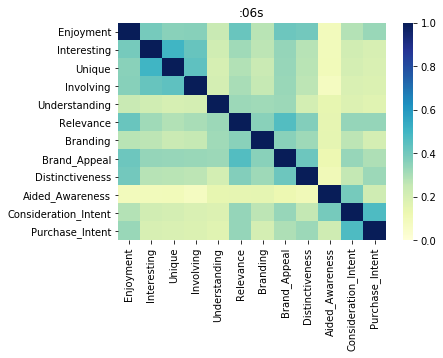

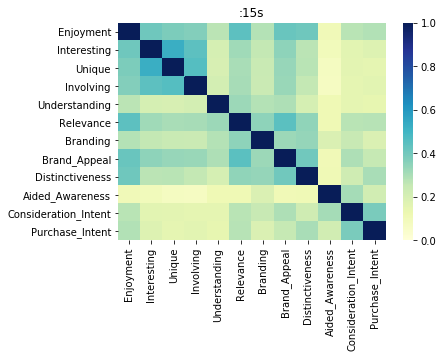

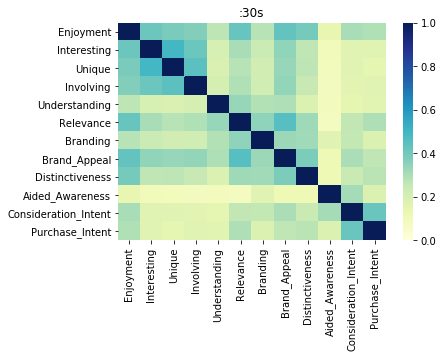

In [31]:
for data, name in zip([matrix_6, matrix_15, matrix_30], [':06', ':15', ':30']):
    sns.heatmap(data=data, vmin=0, vmax=1, cmap="YlGnBu").set_title(name + 's')
    plt.show()

### Appendix:  Removed Analyses

### Top Box Mean Differences

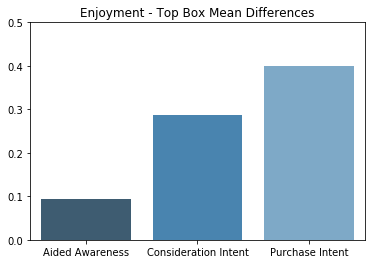

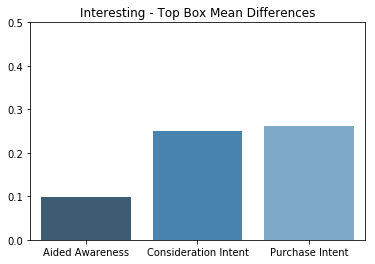

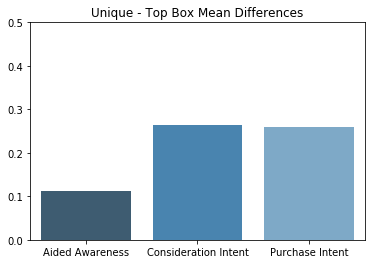

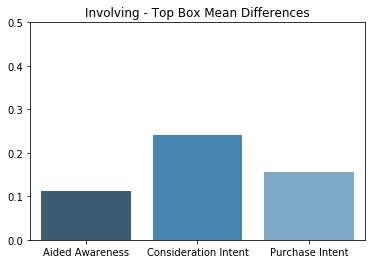

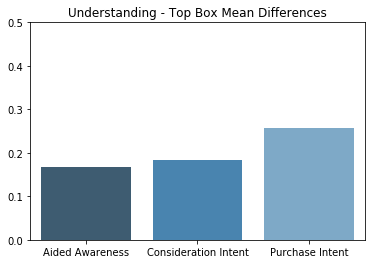

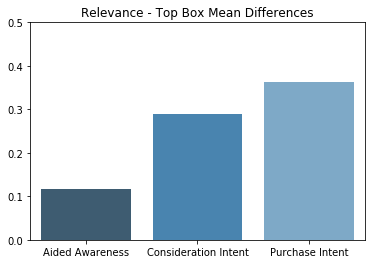

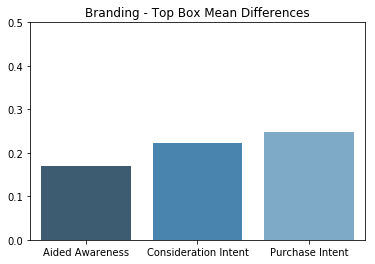

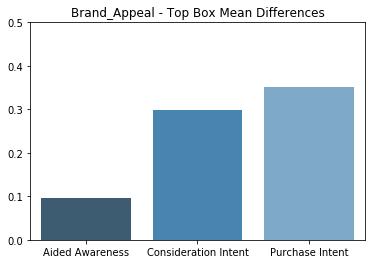

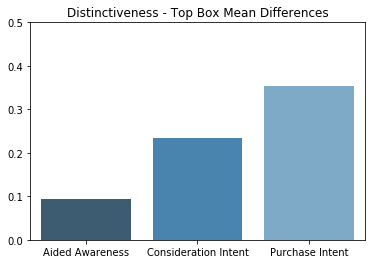

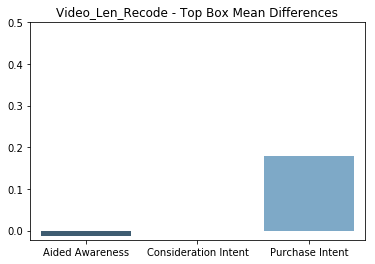

In [120]:
for label in labels[2:]:
    aided_x = df.loc[df[label]==1, 'Aided_Awareness'].mean() - df.loc[df[label]==0, 'Aided_Awareness'].mean()
    cons_x = df_cons.loc[df[label]==1, 'Consideration_Intent'].mean() - df_cons.loc[df[label]==0, 'Consideration_Intent'].mean()
    purch_x = df_purch.loc[df[label]==1, 'Purchase_Intent'].mean() - df_purch.loc[df[label]==0, 'Purchase_Intent'].mean()
    sns.barplot(x=['Aided Awareness', 'Consideration Intent', 'Purchase Intent'], 
                y=[aided_x, cons_x, purch_x],
                palette='Blues_d').set_title(label + ' - Top Box Mean Differences')
    plt.ylim((None, 0.5))
    plt.show()

### Heat Maps of Binary Associations

In [35]:
## Make an association matrix based on: equal_values / all_values between two columns of binary data.
matrix = []

def make_matrix(data, cols):
    matrix = []
    
    for col_y in cols:
        row = []
        for col_x in cols:
            eq = data[col_x] == data[col_y]
            coef = sum(eq) / len(data[[col_x, col_y]].dropna())
            row.append(coef)
        matrix.append(row)
    
    return pd.DataFrame(matrix, columns=cols, index=cols)

#DF associations.
asn_aided = make_matrix(df, labels[1:])
asn_cons = make_matrix(df_cons, labels[1:])
asn_purch = make_matrix(df_purch, labels[1:])

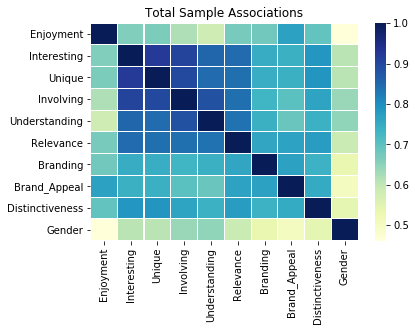

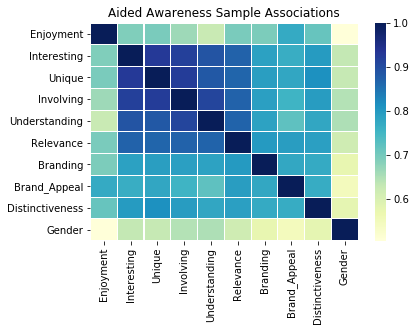

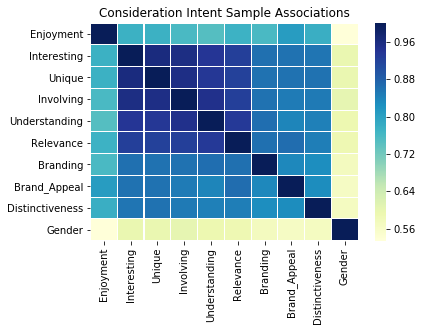

In [36]:
dfs = [asn_aided, asn_cons, asn_purch]
titles = ['Total Sample Associations', 'Aided Awareness Sample Associations', 'Consideration Intent Sample Associations']

for data, title in zip(dfs, titles):
    sns.heatmap(data, linewidths=0.1, cmap="YlGnBu").set_title(title)
    plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Recode,257688.0,1.637030,0.608822,1.0,1.0,2.0,2.0,3.0
Gender,264879.0,0.640621,0.479819,0.0,0.0,1.0,1.0,1.0
Operating_System,147304.0,6.219274,32.559932,0.0,0.0,0.0,1.0,221.0
Aided_Awareness,254679.0,0.611986,0.487299,0.0,0.0,1.0,1.0,1.0
Purchase_Intent,185833.0,0.404745,0.490844,0.0,0.0,0.0,1.0,1.0
Consideration_Intent,183718.0,0.331018,0.470581,0.0,0.0,0.0,1.0,1.0
Enjoyment,191503.0,0.470306,0.499119,0.0,0.0,0.0,1.0,1.0
Interesting,192629.0,0.829527,0.376049,0.0,1.0,1.0,1.0,1.0
Unique,191711.0,0.823119,0.381569,0.0,1.0,1.0,1.0,1.0
Involving,192566.0,0.867043,0.339529,0.0,1.0,1.0,1.0,1.0


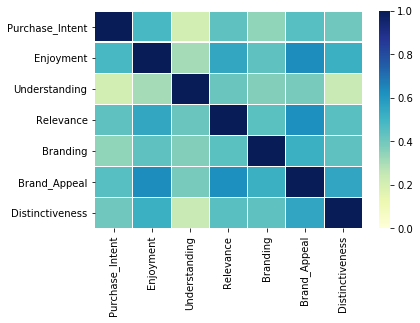

In [37]:
sns.heatmap(corr, linewidths=0.1, cmap="YlGnBu", vmin=0, vmax=1)

In [44]:
df_corr_sample = df_corr.sample(frac=.05).dropna()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


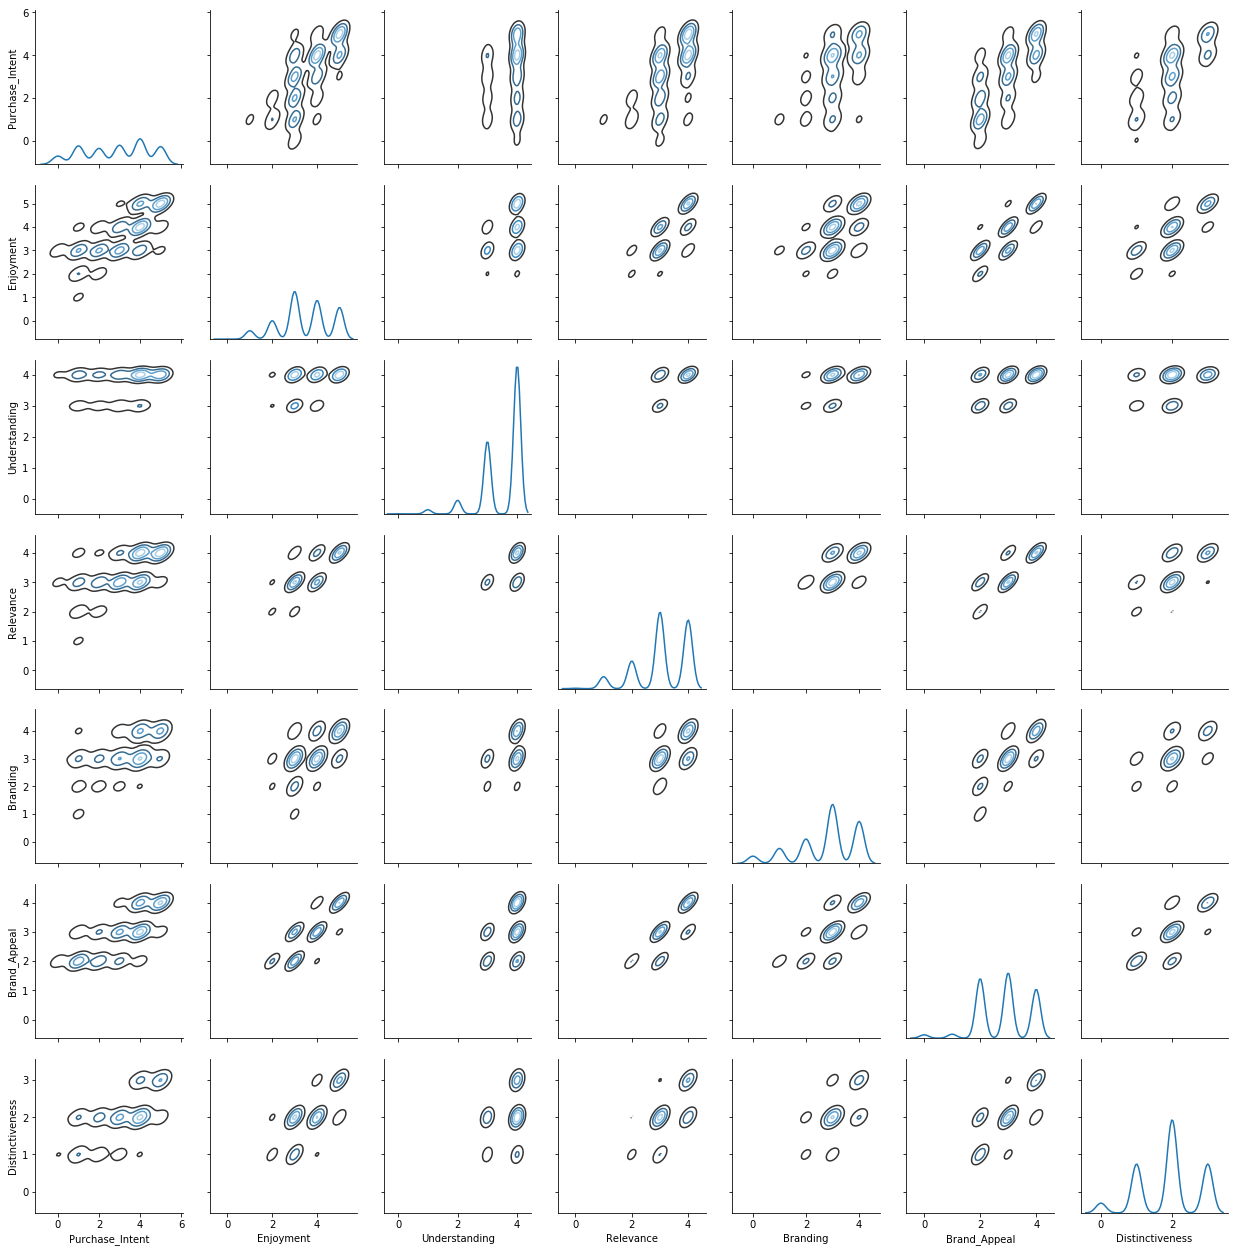

In [47]:
g = sns.PairGrid(df_corr_sample)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=4);

##### Comparison of "Consideration" Associations minus "Aided" Associations.

In [304]:
#DF differences.
aided_cons = asn_cons - asn_aided
cons_purch = asn_purch - asn_cons

Text(0.5,1,'Consideration vs. Aided Awareness Associations')

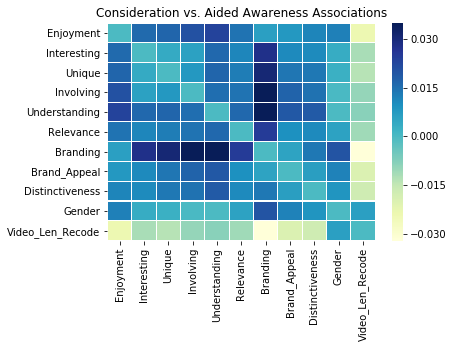

In [305]:
sns.heatmap(aided_cons, linewidths=0.1, cmap="YlGnBu").set_title('Consideration vs. Aided Awareness Associations')

##### Comparison of "Purchase" Associations minus "Consideration" Associations.

Text(0.5,1,'Purchase vs. Consideration Associations')

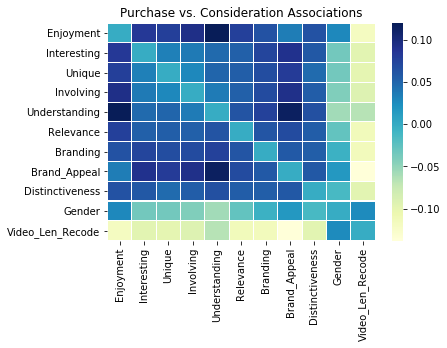

In [306]:
sns.heatmap(cons_purch, linewidths=0.1, cmap="YlGnBu").set_title('Purchase vs. Consideration Associations')